#Birliktelik Kural Analizi (Association Rule Analysis)
Veritabanları içerisinde alışveriş verileri özelinde ürünler arasındaki ilişkiyi ortaya çıkarmak için kullanılan temel tekniklerden biridir. Başka bir deyişle, birlikte daha sık satın alınan ürünler arasındaki ilişkiyi belirlemeyi sağlar.
Denk geldiğim diğer adlandırmalar şunlar: Market Sepet Analizi (Market Basket Analysis), Birliktelik Kuralları (Association Rules), Tavsiye Sistemleri (Recommended Systems)…
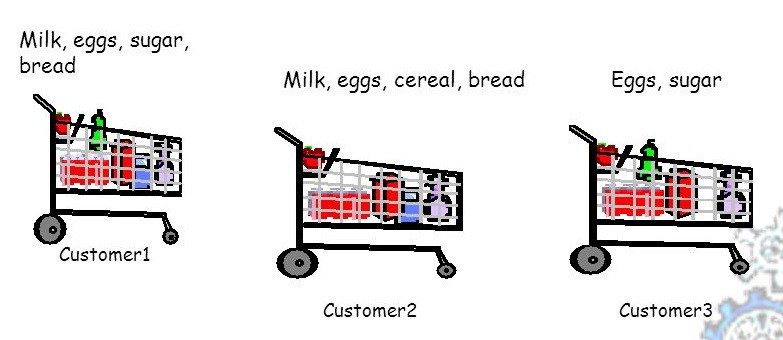<br/>
Görsel bakıldığında Customer1 ile Customer2'nin aldığı ortak ürünlerin Milk, Eggs ve Bread olduğu aynı zamanda Customer3'ün biraz daha farklı bir alışveriş yaptığı dikkat çekiyor.
Bu 3 kişi üzerinden olan durumu binlerce, onbinlerce olan müşteriye genellediğimizi düşünelim. Gün sonunda birliktelik analiz yapıldığında, soracağımız sorular şunlar olmalı?
Hangi üründen ne sıklıkla satın alınmış?
Bu ürün satın alındığında diğer ürünün satın alınma olasılığı nedir?
Bu ürün satın alındığında diğer ürünün satışı % kaç artırmıştır?
Bu analiz promosyon analizi çalışmaları, raf dizimi, müşteri alışkanlıkları analizi, mağazanın düzenlenmesi, stok kontrolü, kupon verilmesi, etkili satış yöntemlerinin geliştirilmesi gibi kavramlara çözüm getirir.


#Apriori Algoritması
Bu alanda çok kullanılan yöntemdir. Birliktelik kuralı analizi bazı metrikler incelenerek gerçekleştirilir.
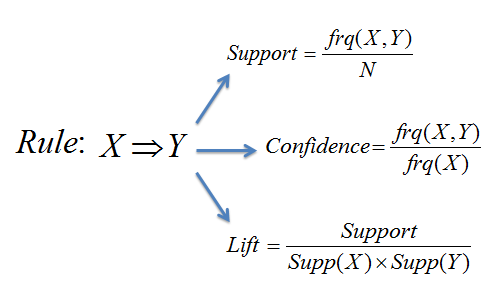<br/>
X: 1.ürün Y: 2.ürün N: Toplam Alışveriş
Destek (Support) : Ürünlerin Birlikte Geçme Olasılığı<br/>
Support(X, Y) = Freq(X,Y)/N<br/>
( X ve Y farklı ürünlerinin birlikte geçme frekansı / Toplam Alışveriş )<br/>
Support değerini hesaplama amacımız eşik değeri belirlemek. Veri setine bakıldığında bir çok ürün beraber görülebilir eşik değerinin altında kalan ürünlerde eleme yapacağız.<br/>
Güven (Confidence) : X’i Alanların Y’yi Alma Olasılığı<br/>
Confidence(X, Y) = Freq(X,Y)/Freq(X)<br/>
( X ve Y farklı ürünlerinin birlikte geçme frekansı / X’in gözlenme frekansı )<br/>
Analiz yapıldığında ister support değerine göre ister confidence değerine göre eşik değeri belirlenebilir. Eşik değerini gerçek hayat verilerinde çok az alabiliriz.<br/>
Lift = Support(X,Y)/(Support(X)*Support(Y))<br/>
X ürünü alanların Y ürünü satın alması şu kadar kat artıyor yorumu vardır.

#Birliktelik Kural Analizi ile Mini Uygulama
##Proje Adımları:<br/>
##3.1. Veriyi Anlama (Data Understanding)
##3.2. Veri Ön İşleme (Data Preprocessing)
##3.3. Veri Birliktelik Kuralları (Data Assocation Rule)
##3.4. Raporlama (Reporting)


##3.1. Veriyi Anlama (Data Understanding)


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# pandas kütüphanesini import ediyoruz.
# .csv formatındaki veri setini okuma işlemi gerçekleştiriyoruz.
# Veri setinin linkini aşağıya bırakıyorum.
# MILK,BREAD,BISCUIT olan sutün başlığını names=['products'] ile products'a çevirdik. names=['products'] kaldırıp farkı görebilirsiniz.
# Veriyi anlamak adına veri setindeki ilk 5 veriyi getiriyoruz.
#Dataset indirme linki:https://www.kaggle.com/aysunrs/association-rules-analysis/version/1
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/datasets_344_727_GroceryStoreDataSet.csv", names=['products'], header = None)
df.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [20]:
# 20 gözlem, 1 sütun var.
df.shape

(20, 1)

In [21]:
# 'Products' adında bir sütun var.
df.columns

Index(['products'], dtype='object')

In [22]:
df.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [23]:
data = list(df["products"].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

##3.2. Veri Ön İşleme (Data Preprocessing)
Bize True-False array ya da One Hot Encoding ile dönüştürülmüş bir dataframe gerek. Bu yüzden mlxtend kütüphanesini kuruyoruz.

In [24]:
!pip install mlxtend

In [25]:
# TransactionEncoded bize istediğimiz True-False arrayını dönüştürmede yardımcı oluyor.
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data, columns = te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


##3.3. Veri Birliktelik Kuralları (Data Assocation Rule)
True-False array üzerinden birliktelik analizleri yapabiliriz. İlk olarak Apriori Algoritmasını uygulamayı deneyelim.

In [26]:
from mlxtend.frequent_patterns import apriori
# df = True-False array ya da One Hot Encoding ile dönüştürülmüş dataframe
# min_support = Tüm kombinasyonların support değerini istemiyorum bu yüzden belirli bir eşik değerini supporta göre getir.
# use_colnames = True, sutün isimlerini göster.
# verbose = 1, Toplam kombinasyon sayısını verir. 
df1 = apriori(df, min_support=0.02, use_colnames = True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(TEA, BREAD, BISCUIT, MAGGI)"
79,0.10,"(CORNFLAKES, COCK, BISCUIT, COFFEE)"
80,0.05,"(JAM, BREAD, MILK, MAGGI)"
81,0.05,"(TEA, BREAD, JAM, MAGGI)"


BISCUIT tüm alışverişlerin % 35'inde,
BREAD tüm alışverişlerin %65'inde veya
TEA, MAGGI, BREAD, BISCUIT tüm satışların % 5'inde beraber yorumları yapılır.

Bazı sektörlerde (e-ticaret vb.) bu hesabın yapılacağı saat aralıkları önem arz edebilir. Yani bütün günlerde yapacak olduğumuz birliktelik analizleri ile zaman boyutu, haftasonu durumu, özel günler gibi durumların özelinde incelemeler yapıldığında ürün birliktelikleri değişebilir.
Örneğin sabah saatlerinde ‘Milk’ ve ‘Eggs’ çıkabilir. Akşam saatlerinde ‘Milk’ ve ‘Wine’ satış ağırlığı yüksek olabilir.<br/>
Support eşik değerinde bu projede 0.02 aldık. Apriori Algoritması support değeri hesabında kullanılır. Confidence veya diğerlerini hesaplamak istersek Association Rule kullanmalıyız.

In [29]:
from mlxtend.frequent_patterns import association_rules

association_rules(df1, metric = "confidence", min_threshold = 0.6)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(COCK),(BISCUIT),0.15,0.35,0.10,0.666667,1.904762,0.0475,1.950
1,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400
2,(JAM),(BREAD),0.10,0.65,0.10,1.000000,1.538462,0.0350,inf
3,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875
4,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750
...,...,...,...,...,...,...,...,...,...
81,"(CORNFLAKES, MILK, COFFEE)",(TEA),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf
82,"(TEA, MILK, COFFEE)",(CORNFLAKES),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf
83,"(TEA, MILK)","(CORNFLAKES, COFFEE)",0.05,0.20,0.05,1.000000,5.000000,0.0400,inf
84,"(TEA, COFFEE)","(CORNFLAKES, MILK)",0.05,0.10,0.05,1.000000,10.000000,0.0450,inf


antecedent support ; Birincinin tek başına görülme olasılığı,
consequent support ; İkincinin tek başına görülme olasılığı,
support ; İkisinin birlikte görülme olasılığı,
confidence ; İlki satıldığında ikinci ürünün satılma olasılığı,
lift ; İlki satıldığında ikinci ürünün satılma olasılığı şu kadar kat arttı yorumu yapılır.

Birliktelik analizi yaptım denildiğinde bulunacak en son tablo budur. Bu tablo üzerinden yorumlamalar, analizler yapılarak aksiyon fikirleri oluşturulur.<br/>
Yukarıda ‘confidence’ göre eşik değeri verdik buna göre listeleme yaptık ama bu göz önünde bulundurulması gereken son metrik değil. Bir kaç metriğin kombinasyonunu da alabilirsiniz.<br/>
Örneğin; support değeri %20 ve confidence değeri %60 diyerek dataframe üzerinden indirgemeler yapabiliriz.

In [30]:
rules = association_rules(df1, metric = "confidence", min_threshold = 0.6)
rules[ (rules['confidence'] >= 0.6) & (rules['support'] >= 0.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
5,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
8,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
9,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
11,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25


#3.4. Raporlama (Reporting)

Alışverişlerde MAGGI’ın tek başına görülme olasığı %25, TEA’in tek başına görülme olasılığı %35.
100 alışverişin 20'sinde mutlaka MAGGI ve TEA beraber satın alınıyor. (support)
MAGGI satıldığında TEA satılma olasılığı 0.800.. yani %80. (confidence)
MAGGI satılan satışlarda TEA satılma olasılığı 2.28 kat artmaktadır. (lift)

##Aksiyon Fikri:
MAGGI alan biri %80 gibi yüksek bir ihtimalle TEA almaktadır ve TEA satışını 2.28 artırmaktadır. Bu iki ürün birbirinden uzak yerlerde konumlandırılarak müşterinin market içi dolaşması sağlanabilir, bu süreçte müşteri diğer ürünlere göz atabilir ve yahut satın alabilir.